In [1]:
!pip install missingno

In [2]:
!pip install sklearn

In [3]:
#Importing the required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn import ensemble


 #### Dataset source : http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls
 #### Journal: http://jse.amstat.org/v19n3/decock.pdf

# Data fields
### Brief description of the features of the data set.

1.	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2.	MSSubClass: The building class
3.	MSZoning: The general zoning classification
4.	LotFrontage: Linear feet of street connected to property
5.	LotArea: Lot size in square feet
6.	Street: Type of road access
7.	Alley: Type of alley access
8.	LotShape: General shape of property
9.	LandContour: Flatness of the property
10.	Utilities: Type of utilities available
11.	LotConfig: Lot configuration
12.	LandSlope: Slope of property
13.	Neighborhood: Physical locations within Ames city limits
14.	Condition1: Proximity to main road or railroad
15.	Condition2: Proximity to main road or railroad (if a second is present)
16.	BldgType: Type of dwelling
17.	HouseStyle: Style of dwelling
18.	OverallQual: Overall material and finish quality
19.	OverallCond: Overall condition rating
20.	YearBuilt: Original construction date
21.	YearRemodAdd: Remodel date
22.	RoofStyle: Type of roof
23.	RoofMatl: Roof material
24.	Exterior1st: Exterior covering on house
25.	Exterior2nd: Exterior covering on house (if more than one material)
26.	MasVnrType: Masonry veneer type
27.	MasVnrArea: Masonry veneer area in square feet
28.	ExterQual: Exterior material quality
29.	ExterCond: Present condition of the material on the exterior
30.	Foundation: Type of foundation
31.	BsmtQual: Height of the basement
32.	BsmtCond: General condition of the basement
33.	BsmtExposure: Walkout or garden level basement walls
34.	BsmtFinType1: Quality of basement finished area
35.	BsmtFinSF1: Type 1 finished square feet
36.	BsmtFinType2: Quality of second finished area (if present)
37.	BsmtFinSF2: Type 2 finished square feet
38.	BsmtUnfSF: Unfinished square feet of basement area
39.	TotalBsmtSF: Total square feet of basement area
40.	Heating: Type of heating
41.	HeatingQC: Heating quality and condition
42.	CentralAir: Central air conditioning
43.	Electrical: Electrical system
44.	1stFlrSF: First Floor square feet
45.	2ndFlrSF: Second floor square feet
46.	LowQualFinSF: Low quality finished square feet (all floors)
47.	GrLivArea: Above grade (ground) living area square feet
48.	BsmtFullBath: Basement full bathrooms
49.	BsmtHalfBath: Basement half bathrooms
50.	FullBath: Full bathrooms above grade
51.	HalfBath: Half baths above grade
52.	Bedroom: Number of bedrooms above basement level
53.	Kitchen: Number of kitchens
54.	KitchenQual: Kitchen quality
55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.	Functional: Home functionality rating
57.	Fireplaces: Number of fireplaces
58.	FireplaceQu: Fireplace quality
59.	GarageType: Garage location
60.	GarageYrBlt: Year garage was built
61.	GarageFinish: Interior finish of the garage
62.	GarageCars: Size of garage in car capacity
63.	GarageArea: Size of garage in square feet
64.	GarageQual: Garage quality
65.	GarageCond: Garage condition
66.	PavedDrive: Paved driveway
67.	WoodDeckSF: Wood deck area in square feet
68.	OpenPorchSF: Open porch area in square feet
69.	EnclosedPorch: Enclosed porch area in square feet
70.	3SsnPorch: Three season porch area in square feet
71.	ScreenPorch: Screen porch area in square feet
72.	PoolArea: Pool area in square feet
73.	PoolQC: Pool quality
74.	Fence: Fence quality
75.	MiscFeature: Miscellaneous feature not covered in other categories
76.	MiscVal: Value of miscellaneous feature
77.	MoSold: Month Sold
78.	YrSold: Year Sold
79.	SaleType: Type of sale
80.	SaleCondition: Condition of sale

In [4]:
# Adding Data into the DataFrame
df=pd.read_excel('https://github.com/SuienS/IBMProject/raw/master/AmesHousing.xls')

In [5]:
pd.options.display.max_columns = 100
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.shape

(2930, 82)

# Data Cleansing
Here we clean the dataset removing all the null values from the dataset.

By below we simplify the column names removing the spaces in the names them.

In [7]:
df.columns = df.columns.str.replace(' ','')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

In [9]:
df.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Below is a visualization of the missing data
We can see that the data is clear not perfect and as missing values. Some features/columns made of more than 80% of null values. 

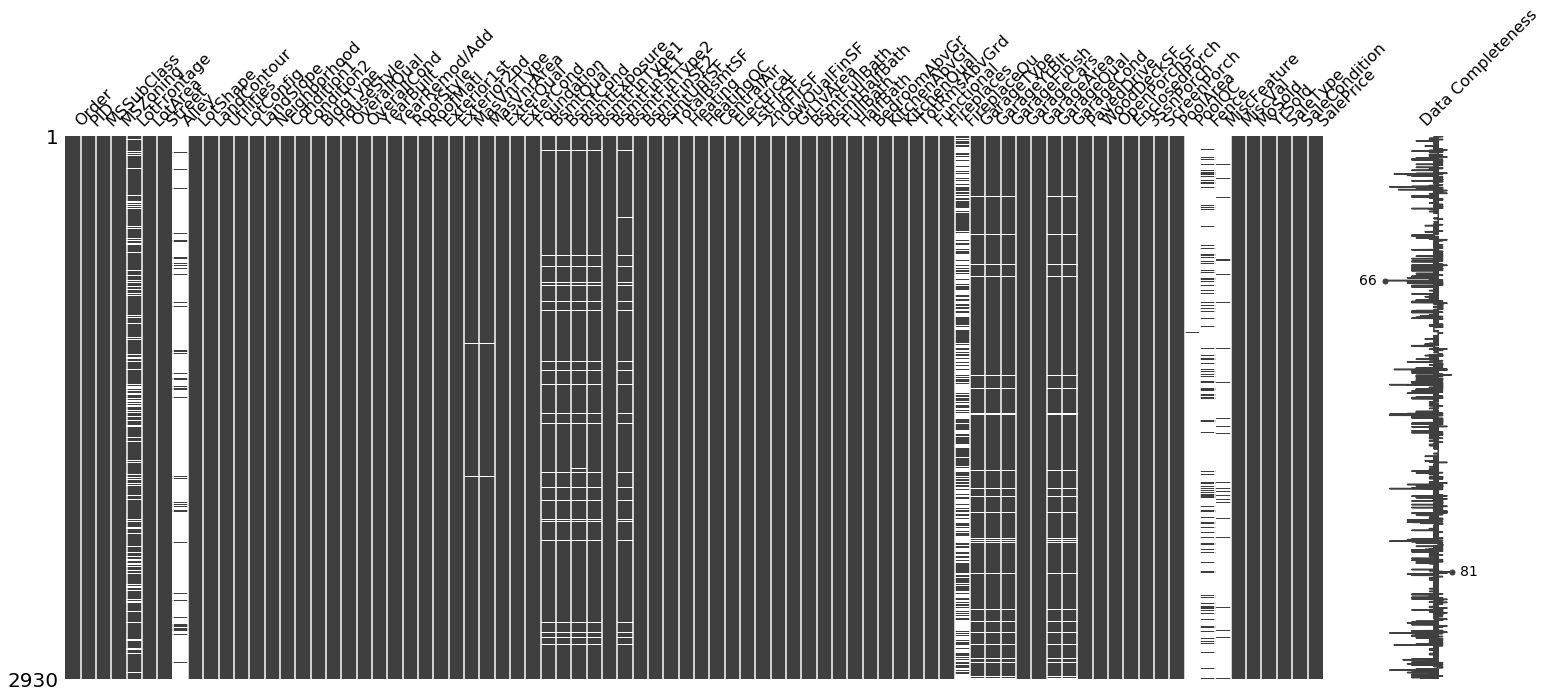

In [10]:
msno.matrix(df, labels=True) 

## Checking for all the null values
Here we get the exact count of the null values in each feature.

In [11]:
pd.options.display.max_rows = 1500
df.isnull().sum()

Order               0
PID                 0
MSSubClass          0
MSZoning            0
LotFrontage       490
LotArea             0
Street              0
Alley            2732
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         23
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           80
BsmtCond           80
BsmtExposure       83
BsmtFinType1       80
BsmtFinSF1          1
BsmtFinType2       81
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF  

As can be seen above 'Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','FireplaceQu' features contain higher majority(more than 80%) of there values as nulls. So it is better to exclude these columns from the consideration.

In [12]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','FireplaceQu'],axis=1,inplace=True)

As 'LotFrontage' column only contains 490 null values it is better to just fill those with the mean value of the feature. (The accuracy of this method was verified iteratively creating the model and checking for the accuracy.)

In [13]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
#checking for all the null values
pd.options.display.max_rows = 1500
df.isnull().sum()

Order              0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType        23
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          80
BsmtCond          80
BsmtExposure      83
BsmtFinType1      80
BsmtFinSF1         1
BsmtFinType2      81
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [15]:
df.shape

(2930, 76)

Then the for others Entries that contributes to those nulls were removed

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(2678, 76)

In [18]:
#checking for all the null values
pd.options.display.max_rows = 1500
df.isnull().sum()

Order            0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [19]:
df.drop(['PID','Order'],axis=1,inplace=True)

### Cleansed Data

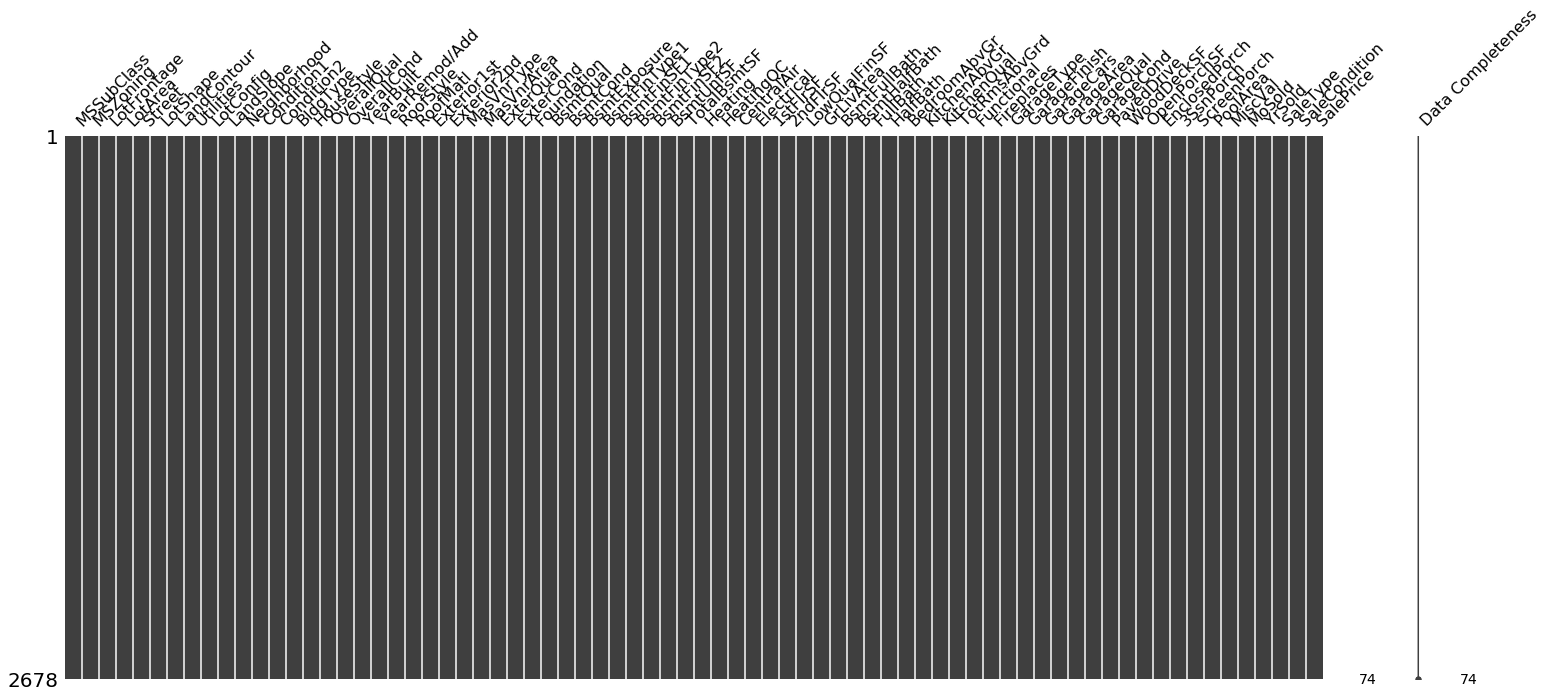

In [20]:
msno.matrix(df, labels=True)

### Final cleansed dataset shape

In [21]:
df.shape

(2678, 74)

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2678 non-null   int64  
 1   MSZoning       2678 non-null   object 
 2   LotFrontage    2678 non-null   float64
 3   LotArea        2678 non-null   int64  
 4   Street         2678 non-null   object 
 5   LotShape       2678 non-null   object 
 6   LandContour    2678 non-null   object 
 7   Utilities      2678 non-null   object 
 8   LotConfig      2678 non-null   object 
 9   LandSlope      2678 non-null   object 
 10  Neighborhood   2678 non-null   object 
 11  Condition1     2678 non-null   object 
 12  Condition2     2678 non-null   object 
 13  BldgType       2678 non-null   object 
 14  HouseStyle     2678 non-null   object 
 15  OverallQual    2678 non-null   int64  
 16  OverallCond    2678 non-null   int64  
 17  YearBuilt      2678 non-null   int64  
 18  YearRemo

# Data modeling

### Columns with classified values
These values were indentified carefully investigating the data descriptions

In [24]:
c_columns=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
           'Condition1','Condition2','BldgType','HouseStyle','SaleType',
        'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
           'GarageQual','GarageCond','PavedDrive']

In [25]:
len(c_columns)

39

### Function for the one hot encoding the classified features

In [26]:
def convert_category_onehot(categorical_columns,in_df):
    df_onehot=in_df
    i=0
    for field_val in categorical_columns:
        
        print(field_val)
        df_temp=pd.get_dummies(in_df[field_val],drop_first=True)
        
        in_df.drop([field_val],axis=1,inplace=True)
        if i==0:
            df_onehot=df_temp.copy()
        else:
            
            df_onehot=pd.concat([df_onehot,df_temp],axis=1)
        i=i+1
       
        
    df_onehot=pd.concat([in_df,df_onehot],axis=1)
        
    return df_onehot

In [27]:
clone_df = df.copy()

In [28]:
df = convert_category_onehot(c_columns,df)

MSSubClass
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [29]:
df.shape

(2678, 253)

In [30]:
pd.options.display.max_columns = 500
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190,FV,I (all),RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,NoSewr,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,Fa,Gd,TA,CBlock,PConc,Stone,Wood,Fa,Gd,Po,TA,Fa,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,CBlock,None,Stone,GasW,Grav,OthW,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,Po,TA,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

### Duplicated column names were then resolved

In [31]:
cols=pd.Series(df.columns)

for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

df.columns=cols


In [32]:
pd.options.display.max_columns = 500
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190,FV,I (all),RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,NoSewr,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr.1,Norm.1,PosA.1,PosN.1,RRAe.1,RRAn.1,RRNn.1,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,Fa.1,Gd.1,TA.1,CBlock,PConc,Stone,Wood,Fa.2,Gd.2,Po.1,TA.2,Fa.3,Gd.3,Po.2,TA.3,Gd.4,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ.1,GLQ.1,LwQ.1,Rec.1,Unf.1,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BrkComm,BrkFace,CBlock.1,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone.1,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace.1,CBlock.2,CmentBd,HdBoard.1,ImStucc.1,MetalSd.1,Other,Plywood.1,Stone.2,Stucco.1,VinylSd.1,Wd Sdng.1,Wd Shng,BrkFace.2,CBlock.3,None,Stone.3,GasW,Grav,OthW,Fa.4,Gd.5,Po.3,TA.4,Y,FuseF,FuseP,Mix,SBrkr,Fa.5,Gd.6,Po.4,TA.5,Maj2,Min1,Min2,Mod.1,Sal,Sev.1,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf.2,Fa.6,Gd.7,Po.5,TA.6,Fa.7,Gd.8,Po.6,TA.7,P,Y.1
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0

Input X (X_df) and Output Y (Y_df) seperated from the dataset as below

In [33]:
Y_df = df['SalePrice']


In [34]:
X_df = df.copy()
X_df.drop(['SalePrice'],axis=1,inplace=True)

In [35]:
print ('Input X Shape:',X_df.shape)
print ('Output Y Shape:' , Y_df.shape)


Input X Shape: (2678, 252)
Output Y Shape: (2678,)


### Train and Test dataset was then divided
20% of the total dataset was used as the test dataset

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2)


Train and Test dataset shapes

In [37]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(2142, 252) (2142,)
(536, 252) (536,)


In [38]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100

    return loss

In [39]:
def accuracy(y_true, y_pred):
 
    accuracy = (100 - rmspe(y_true,y_pred))

    return accuracy

# Data Model Training and Evaluation

## GreadientBoostRegressor: Regression prediction model build
Parameters of it was tuned building the model iteratively and obervising the model building output

In [40]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 6000, max_depth = 1 , min_samples_split = 2,
          learning_rate = 0.5, loss = 'ls', verbose=1)

In [41]:
gbr.fit(x_train, y_train)


      Iter       Train Loss   Remaining Time 
         1  4077577139.7309           34.54s
         2  3083412521.0778           33.91s
         3  2461651588.9798           33.18s
         4  2072663939.6772           33.13s
         5  1824859441.6657           32.86s
         6  1643619793.5232           32.79s
         7  1514990397.0425           32.59s
         8  1392077574.0314           32.97s
         9  1312484570.5856           32.97s
        10  1253057023.5276           32.82s
        20   912239663.6596           31.38s
        30   767359245.8549           31.05s
        40   680782595.7104           30.75s
        50   620761636.5450           30.50s
        60   576182800.0001           30.33s
        70   540214178.2881           30.23s
        80   510472516.1728           30.62s
        90   486456502.8841           30.78s
       100   465271119.3880           30.91s
       200   351522508.8032           29.88s
       300   304822831.6893           29.14s
       40

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [42]:
y_pred_gb = gbr.predict(x_test)

### Coefficient of determination R^2 of the prediction:
The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

[Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html]

In [43]:
gbr.score(x_test,y_test)

0.9084242835124453

In [44]:
gbr_score = r2_score(y_test, y_pred_gb, sample_weight=None, multioutput='uniform_average')
gbr_score

0.9084242835124453

### Coefficient of Determination Percentage: GreadientBoostRegressor


In [45]:
print(gbr_score*100,"%")

90.84242835124454 %


#### Root Mean Square Percentage Accuracy: GreadientBoostRegressor

In [46]:
print(accuracy(y_test, y_pred_gb),"%")

84.75106602029908 %


## XGBRegressor: Regression prediction model build
Parameters of it was tuned building the model iteratively and obervising the model building output

In [47]:
classifier=xgb.XGBRegressor()
regressor=xgb.XGBRegressor()

In [48]:
regressor=xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bytree=1, gamma=0,
                                          learning_rate=0.5, max_delta_step=0,
                                          max_depth=2, min_child_weight=1,
                                          missing=None, n_estimators=2000,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, subsample=1)

In [49]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [50]:
y_pred_xgbr=regressor.predict(x_test)

### Coefficient of Determination: XGBRegressor

In [51]:
xgbr_score = r2_score(y_test, y_pred_xgbr, sample_weight=None, multioutput='uniform_average')
xgbr_score

0.9179541322411636

### Coefficient of Determination Percentage: XGBRegressor


In [52]:
print(xgbr_score*100,"%")

91.79541322411636 %


#### Root Mean Square Percentage Accuracy: XGBRegressor

In [53]:
accuracy(y_test,y_pred_xgbr)

85.49609012150869

## Averaging the predictions from both the models
This help in maintaining a healthy and consistant accuracy score

In [54]:
avg_pred = (y_pred_gb+y_pred_xgbr)/2

### Coefficient of Determination: Final Averaged Model

In [55]:
avg_score = r2_score(y_test, avg_pred, sample_weight=None, multioutput='uniform_average')
avg_score

0.9226332690833382

### Coefficient of Determination Percentage: Final Averaged Model

In [56]:
print(avg_score*100,'%')

92.26332690833382 %


#### Root Mean Square Percentage Accuracy: Final Averaged Model

In [57]:
print(accuracy(y_test,avg_pred),"%")

85.7767483902004 %


### Predicted Data

In [58]:
avg_pred

array([113725.42812801, 155650.15895971, 143877.5655643 , 105831.14449418,
       189289.21270959, 157881.49836616, 184035.29260153, 138178.72649232,
       126442.64720649, 269042.01711131, 249992.27155495, 126520.15782434,
       197335.61933504, 167537.92024784, 268663.13006366, 177608.15193423,
       143149.54353907, 138464.40406747, 254455.21654106, 202916.76085596,
        76724.48361822, 497665.45964883, 167282.42085002, 166528.20703752,
       199382.27577716, 127950.03756988, 170735.00127974, 236720.43002482,
       143184.07817668, 161813.20098085, 139913.23060707, 214205.11263149,
       126976.30089494, 478716.52139869, 159617.21809351, 166226.94851158,
        97923.536283  , 161761.92388258, 139579.28153697, 271773.08538769,
       100833.5402011 , 149348.35883406, 196612.32770619, 116583.44267531,
       113929.24138463, 247075.96091218, 279160.40846148, 202913.39829365,
       226649.5463725 , 211666.12756354, 142914.14479963, 131622.32536841,
       197462.41312574, 1

## Deep Learning ANN Model Build: Keras

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.layers import Flatten
from keras import backend as K


Using TensorFlow backend.
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/RaviduSilva/opt/ana

Root mean squared error was used as it is what matches to the Use Case

In [60]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [61]:
# Sequencial ANN was used
classifier0 = Sequential()

# Input layer and the 1st hidden layer
classifier0.add(Dense(output_dim = 72, init = 'he_uniform',activation='relu',input_dim = 252))
# 2nd hidden layer
classifier0.add(Dense(output_dim = 36, init = 'he_uniform',activation='relu'))
# 3rd hidden layer
classifier0.add(Dense(output_dim = 72, init = 'he_uniform',activation='relu'))
# Output layer
classifier0.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling
classifier0.compile(loss=root_mean_squared_error, optimizer='Nadam')

# Fitting
model_history=classifier0.fit(x_train.values, y_train.values,validation_split=0.1, batch_size = 12, epochs = 600)

Instructions for updating:
Colocations handled automatically by placer.


/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=252, units=72, kernel_initializer="he_uniform")`
  """
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=36, kernel_initializer="he_uniform")`
  import sys
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=72, kernel_initializer="he_uniform")`
  if __name__ == '__main__':
/Users/RaviduSilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 1927 samples, validate on 215 samples
Epoch 1/600
1927/1927 [==============================] - 1s 358us/step - loss: 91211.1365 - val_loss: 49041.5820
Epoch 2/600
1927/1927 [==============================] - 0s 216us/step - loss: 46112.0151 - val_loss: 41988.7000
Epoch 3/600
1927/1927 [==============================] - 0s 203us/step - loss: 40044.5016 - val_loss: 41823.0089
Epoch 4/600
1927/1927 [==============================] - 0s 207us/step - loss: 38330.5472 - val_loss: 43635.2007
Epoch 5/600
1927/1927 [==============================] - 0s 216us/step - loss: 38440.1139 - val_loss: 52442.5468
Epoch 6/600
1927/1927 [==============================] - 0s 213us/step - loss: 37956.7882 - val_loss: 43964.5099
Epoch 7/600
1927/1927 [==============================] - 0s 210us/step - loss: 37495.3158 - val_loss: 44385.2760
Epoch 8/600
1927/1927 [==============================] - 0s 212us/step - loss: 36902.4847 - val_loss: 41016.8750
Epoch 9/600
1927/1927 [==========================

1927/1927 [==============================] - 0s 212us/step - loss: 25167.7850 - val_loss: 25414.3871
Epoch 73/600
1927/1927 [==============================] - 0s 209us/step - loss: 25811.8562 - val_loss: 23848.3456
Epoch 74/600
1927/1927 [==============================] - 0s 212us/step - loss: 25267.9979 - val_loss: 27209.5188
Epoch 75/600
1927/1927 [==============================] - 0s 213us/step - loss: 24802.3743 - val_loss: 31640.1204
Epoch 76/600
1927/1927 [==============================] - 0s 221us/step - loss: 25581.0397 - val_loss: 25565.0574
Epoch 77/600
1927/1927 [==============================] - 0s 212us/step - loss: 25129.9122 - val_loss: 29101.1887
Epoch 78/600
1927/1927 [==============================] - 0s 216us/step - loss: 25222.5845 - val_loss: 23561.2612
Epoch 79/600
1927/1927 [==============================] - 0s 203us/step - loss: 25076.9785 - val_loss: 22533.4163
Epoch 80/600
1927/1927 [==============================] - 0s 215us/step - loss: 24974.8089 - val_loss

1927/1927 [==============================] - 0s 212us/step - loss: 20999.2654 - val_loss: 20242.1685
Epoch 144/600
1927/1927 [==============================] - 0s 206us/step - loss: 20683.8993 - val_loss: 21001.7263
Epoch 145/600
1927/1927 [==============================] - 0s 207us/step - loss: 20344.2587 - val_loss: 20520.4515
Epoch 146/600
1927/1927 [==============================] - 0s 202us/step - loss: 20009.8771 - val_loss: 27148.5936
Epoch 147/600
1927/1927 [==============================] - 0s 209us/step - loss: 20375.2104 - val_loss: 20146.6783
Epoch 148/600
1927/1927 [==============================] - 0s 206us/step - loss: 20280.9213 - val_loss: 19212.3117
Epoch 149/600
1927/1927 [==============================] - 0s 216us/step - loss: 20022.3638 - val_loss: 20703.0140
Epoch 150/600
1927/1927 [==============================] - 0s 203us/step - loss: 19905.5853 - val_loss: 19693.6122
Epoch 151/600
1927/1927 [==============================] - 0s 215us/step - loss: 20342.7933 - 

1927/1927 [==============================] - 0s 209us/step - loss: 19257.7248 - val_loss: 19602.9415
Epoch 215/600
1927/1927 [==============================] - 0s 209us/step - loss: 18617.8353 - val_loss: 18337.8969
Epoch 216/600
1927/1927 [==============================] - 0s 205us/step - loss: 18559.2221 - val_loss: 19488.3294
Epoch 217/600
1927/1927 [==============================] - 0s 207us/step - loss: 17800.5036 - val_loss: 18816.8305
Epoch 218/600
1927/1927 [==============================] - 0s 199us/step - loss: 17490.6777 - val_loss: 19846.4314
Epoch 219/600
1927/1927 [==============================] - 0s 201us/step - loss: 18243.6275 - val_loss: 22902.1279
Epoch 220/600
1927/1927 [==============================] - 0s 210us/step - loss: 17910.7591 - val_loss: 18831.6663
Epoch 221/600
1927/1927 [==============================] - 0s 208us/step - loss: 17928.4832 - val_loss: 19442.1999
Epoch 222/600
1927/1927 [==============================] - 0s 211us/step - loss: 17876.8899 - 

1927/1927 [==============================] - 0s 207us/step - loss: 16669.1275 - val_loss: 18152.9047
Epoch 286/600
1927/1927 [==============================] - 0s 209us/step - loss: 17058.7654 - val_loss: 18445.4436
Epoch 287/600
1927/1927 [==============================] - 0s 207us/step - loss: 16543.0668 - val_loss: 18131.5236
Epoch 288/600
1927/1927 [==============================] - 0s 200us/step - loss: 16792.2235 - val_loss: 21792.2803
Epoch 289/600
1927/1927 [==============================] - 0s 211us/step - loss: 17190.2644 - val_loss: 18733.4621
Epoch 290/600
1927/1927 [==============================] - 0s 211us/step - loss: 16985.1140 - val_loss: 18616.2451
Epoch 291/600
1927/1927 [==============================] - 0s 211us/step - loss: 16455.3911 - val_loss: 20428.8324
Epoch 292/600
1927/1927 [==============================] - 0s 236us/step - loss: 16655.7331 - val_loss: 17661.0735
Epoch 293/600
1927/1927 [==============================] - 0s 221us/step - loss: 16554.0201 - 

1927/1927 [==============================] - 0s 234us/step - loss: 16427.0662 - val_loss: 19151.4812
Epoch 357/600
1927/1927 [==============================] - 1s 297us/step - loss: 15710.5066 - val_loss: 18641.1272
Epoch 358/600
1927/1927 [==============================] - 1s 280us/step - loss: 15679.9890 - val_loss: 18671.7099
Epoch 359/600
1927/1927 [==============================] - 0s 211us/step - loss: 15710.1282 - val_loss: 23394.5732
Epoch 360/600
1927/1927 [==============================] - 1s 280us/step - loss: 15825.4255 - val_loss: 18928.6954
Epoch 361/600
1927/1927 [==============================] - 0s 235us/step - loss: 15752.0641 - val_loss: 22345.6948
Epoch 362/600
1927/1927 [==============================] - 1s 263us/step - loss: 16351.9620 - val_loss: 19871.6376
Epoch 363/600
1927/1927 [==============================] - 0s 242us/step - loss: 15635.2820 - val_loss: 18954.4019
Epoch 364/600
1927/1927 [==============================] - 1s 270us/step - loss: 15656.0583 - 

1927/1927 [==============================] - 0s 214us/step - loss: 14951.6593 - val_loss: 20872.9301
Epoch 428/600
1927/1927 [==============================] - 0s 209us/step - loss: 15080.7783 - val_loss: 20644.6924
Epoch 429/600
1927/1927 [==============================] - 0s 215us/step - loss: 14812.1032 - val_loss: 19535.0617
Epoch 430/600
1927/1927 [==============================] - 0s 214us/step - loss: 15226.4794 - val_loss: 20324.6179
Epoch 431/600
1927/1927 [==============================] - 0s 213us/step - loss: 15284.7987 - val_loss: 20851.5044
Epoch 432/600
1927/1927 [==============================] - 0s 205us/step - loss: 14984.6212 - val_loss: 20968.2295
Epoch 433/600
1927/1927 [==============================] - 0s 221us/step - loss: 15273.7027 - val_loss: 19763.5508
Epoch 434/600
1927/1927 [==============================] - 0s 211us/step - loss: 15108.9979 - val_loss: 18869.0234
Epoch 435/600
1927/1927 [==============================] - 0s 210us/step - loss: 15175.3457 - 

1927/1927 [==============================] - 0s 206us/step - loss: 14797.5020 - val_loss: 22902.4413
Epoch 499/600
1927/1927 [==============================] - 0s 216us/step - loss: 15279.4571 - val_loss: 20128.0942
Epoch 500/600
1927/1927 [==============================] - 0s 230us/step - loss: 14330.8081 - val_loss: 20480.1423
Epoch 501/600
1927/1927 [==============================] - 0s 191us/step - loss: 14663.3672 - val_loss: 21277.6545
Epoch 502/600
1927/1927 [==============================] - 0s 190us/step - loss: 14429.4263 - val_loss: 20542.8640
Epoch 503/600
1927/1927 [==============================] - 0s 197us/step - loss: 14696.8224 - val_loss: 20446.4749
Epoch 504/600
1927/1927 [==============================] - 0s 191us/step - loss: 14354.6689 - val_loss: 19786.0776
Epoch 505/600
1927/1927 [==============================] - 0s 190us/step - loss: 14564.0269 - val_loss: 19974.1532
Epoch 506/600
1927/1927 [==============================] - 0s 190us/step - loss: 14681.5193 - 

1927/1927 [==============================] - 0s 188us/step - loss: 14209.8224 - val_loss: 19363.0467
Epoch 570/600
1927/1927 [==============================] - 0s 188us/step - loss: 13926.2449 - val_loss: 21208.7079
Epoch 571/600
1927/1927 [==============================] - 0s 189us/step - loss: 14017.7499 - val_loss: 22994.0206
Epoch 572/600
1927/1927 [==============================] - 0s 190us/step - loss: 14041.6962 - val_loss: 20838.9458
Epoch 573/600
1927/1927 [==============================] - 0s 190us/step - loss: 13958.6737 - val_loss: 20843.2022
Epoch 574/600
1927/1927 [==============================] - 0s 189us/step - loss: 13881.4565 - val_loss: 19992.8074
Epoch 575/600
1927/1927 [==============================] - 0s 197us/step - loss: 14125.5684 - val_loss: 21646.7951
Epoch 576/600
1927/1927 [==============================] - 0s 196us/step - loss: 14322.6775 - val_loss: 21186.3562
Epoch 577/600
1927/1927 [==============================] - 0s 200us/step - loss: 14479.6563 - 

In [62]:

ann_y_pred=classifier0.predict(x_test.values)


### Coefficient of Determination: ANN Model

In [63]:
ann_pred_score = r2_score(y_test, ann_y_pred, sample_weight=None, multioutput='uniform_average')
ann_pred_score

0.9134466512237135

### Coefficient of Determination Percentage: ANN Model

In [64]:
print(ann_pred_score*100,'%')

91.34466512237135 %


#### Root Mean Square Percentage Accuracy: ANN Model

In [65]:
accuracy( y_test, (ann_y_pred.transpose()[0]) )

84.81170346524372